# 🌍 **Wildlife Habitat Suitability Modeling Overview** 🌍

This project combines **Environmental Engineering** and **Data Science** to predict the suitability of habitats for different wildlife species using real-world data. The goal is to create a model that can determine the most suitable regions for specific species based on various environmental factors like elevation, precipitation, and vegetation index.

### 🛠 **Key Steps in the Project** 🛠

---

### 1. **Data Collection and Preprocessing** 📚
   - The dataset is loaded from a **.txt file** containing information about different regions and their environmental descriptions.
   - **Data cleaning** steps include:
     - Filtering rows with more or less than three columns.
     - Encoding categorical columns like **Region** and **Description** using **Label Encoding** to make them suitable for machine learning models.

**Important Notes**:
   - The dataset needs to be cleaned and preprocessed to ensure it is ready for analysis.
   - Proper **encoding** of categorical data is crucial to making predictions with algorithms.

---

### 2. **Map Visualization** 🗺️
   - We use **Folium** to create an interactive map to visualize the habitat suitability across different regions.
   - **Marker Clustering** is applied to group regions with similar characteristics, making it easier to interpret spatial patterns.

**Important Notes**:
   - Visualization tools like **Folium** and **Plotly** help us understand the geographical patterns in the data.
   - Use **geospatial data** (e.g., latitude and longitude) to map locations accurately.

---

### 3. **Data Analysis and Correlation** 🔍
   - **Correlation analysis** helps us understand relationships between numeric features.
   - A **heatmap** is generated to visualize the correlation between environmental factors and habitat suitability.

**Important Notes**:
   - Analyzing correlations is crucial to understanding which factors influence habitat suitability.
   - The **correlation heatmap** provides insights into how features interact with each other.

---

### 4. **Balancing the Dataset with SMOTE** ⚖️
   - **SMOTE (Synthetic Minority Over-sampling Technique)** is applied to balance the dataset and prevent bias in the model caused by imbalanced classes.
   - This ensures that the model learns to predict all classes (regions) effectively.

**Important Notes**:
   - Imbalanced datasets can lead to skewed predictions, so balancing them is essential for accurate results.
   - **SMOTE** helps generate synthetic data points for underrepresented classes.

---

### 5. **Model Training and Evaluation** 🧠
   - **Logistic Regression** (as a Maxent-like model) is used to train the habitat suitability model.
   - The model is evaluated using **accuracy scores** and **classification reports** to determine how well it predicts suitable habitats.

**Important Notes**:
   - Choosing the right machine learning model is critical for accurate predictions.
   - Model evaluation metrics, such as **accuracy** and **classification reports**, help assess the performance of the model.

---

### 6. **Dash Dashboard for Model Insights** 📊
   - A **Dash** application is built to display the model's predictions and feature importance.
   - The dashboard includes:
     - A **bar chart** showing the importance of each feature in the model.
     - A **data table** displaying the model predictions for different regions.

**Important Notes**:
   - Dash is a powerful tool for building interactive dashboards that allow users to visualize model results in real-time.
   - The **feature importance** chart helps us understand which environmental factors are most influential in determining habitat suitability.

---

### 💡 **Key Learnings for Environmental Engineers & Data Scientists** 💡

- **Data Science**: Data preprocessing, feature encoding, model training, and evaluation are all fundamental skills for data scientists working in **environmental domains**.
- **Environmental Engineering**: Understanding the **geospatial patterns** and **environmental factors** influencing wildlife habitat suitability is crucial for engineers working in conservation and land management.
- **Machine Learning**: The ability to apply **SMOTE** for balancing datasets, train models like **Logistic Regression**, and visualize insights using **Dash** is essential for creating effective predictive models.

---

### 🚀 **Next Steps** 🚀
   - Enhance the model by experimenting with more advanced algorithms like **Random Forest** or **XGBoost**.
   - Expand the dataset with additional environmental factors and more regions to improve prediction accuracy.
   - Integrate real-time data into the **Dash dashboard** for dynamic habitat suitability predictions.

---

### 🌿 **Final Thought** 🌿

This project demonstrates how data science can be applied to solve **environmental engineering** problems. By combining **machine learning** with environmental data, we can make informed decisions to protect wildlife and manage ecosystems more effectively. 🌎✨

# 📦 **Importing Libraries** 📦

In this step, we load the necessary Python libraries required for data manipulation, visualization, and modeling. Below is a brief overview of the most important libraries:

- **Pandas**: For data manipulation and cleaning.
- **NumPy**: For numerical computations.
- **Matplotlib and Seaborn**: For data visualization.
- **Folium**: For map visualization.
- **SMOTE**: For balancing the dataset.
- **Scikit-learn**: For machine learning algorithms and tools like encoding, splitting data, and model evaluation.
- **Dash**: For building interactive dashboards.

Remember to install these libraries in your environment if they are not already available.

In [49]:
import warnings

In [50]:
warnings.filterwarnings('ignore')

In [169]:
pip install dash plotly

In [51]:
import pandas as pd

In [52]:
import folium

In [53]:
from folium.plugins import MarkerCluster

In [54]:
import matplotlib.pyplot as plt

In [55]:
import seaborn as sns

In [170]:
import dash

In [171]:
import plotly.graph_objs as go

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.metrics import classification_report, accuracy_score

In [172]:
from dash import dcc, html

In [173]:
from dash.dash_table import DataTable

In [174]:
from dash import Input, Output

# 📚 **Data Loading and Preprocessing** 📚

In this step, we load the dataset and perform some key preprocessing tasks:

1. **Loading the Data**:
   - Use Pandas to load the data from the `.txt` file.
   - Ensure the data is in a format that can be processed (i.e., DataFrame).
   
2. **Data Cleaning**:
   - Filter out rows that contain fewer or more than three columns.
   - Drop any irrelevant columns that may not contribute to our model.
   
3. **Handling Missing Values**:
   - Check for missing data and apply appropriate imputation or removal strategies.

4. **Label Encoding**:
   - For categorical columns, apply **Label Encoding** to convert them into numerical format so that machine learning models can process them.
   
5. **Feature Scaling**:
   - If necessary, scale numerical features to ensure consistent ranges for the model.

In [60]:
# Load the dataset from the .txt file

In [61]:
file_path = '/content/distribution.txt'

In [62]:
with open(file_path, 'r') as file:
    data = file.readlines()

In [ ]:
# Display the first few lines to understand the structure

In [ ]:
print("First few lines of the dataset:")
for line in data[:10]:  # Adjust 10 to inspect more or fewer lines
    print(line)

In [63]:
# Filter out rows that have more or less than 3 columns (based on inspection)


In [64]:
filtered_data = []

In [65]:
for line in data:
    columns = line.split()
    if len(columns) == 3:  # Only keep rows with exactly 3 columns
        filtered_data.append(columns)

In [66]:
# Convert the filtered data into a DataFrame

In [67]:
df = pd.DataFrame(filtered_data, columns=['ID', 'Region', 'Description'])

In [68]:
# Display the first few rows to inspect the dataset

In [69]:
df.head()

,ID,Region,Description
0,1805,East,Pacific
1,2305,North,America
2,2315,North,America
3,2316,North,America
4,2317,North,America


In [70]:
# Optionally, save the cleaned dataset as a CSV file

In [71]:
df.to_csv('/content/distribution_cleaned.csv', index=False)

In [72]:
# Load the cleaned CSV file

In [73]:
csv_path = '/content/distribution_cleaned.csv'

In [74]:
df = pd.read_csv(csv_path)

In [75]:
# Display the first few rows of the dataset

In [76]:
print("Head of the dataset:")
print(df.head())

Head of the dataset:
     ID Region Description
0  1805   East     Pacific
1  2305  North     America
2  2315  North     America
3  2316  North     America
4  2317  North     America


In [83]:
# Get general information about the dataset (e.g., column data types, non-null counts)


In [84]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282811 entries, 0 to 282810
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           282811 non-null  int64 
 1   Region       282811 non-null  object
 2   Description  282811 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.5+ MB
None


In [77]:
# Get statistical summary of the dataset (if applicable)

In [78]:
print("\nDataset Description:")
print(df.describe())


Dataset Description:
                 ID
count  2.828110e+05
mean   7.240906e+05
std    3.646744e+05
min    1.805000e+03
25%    5.651555e+05
50%    7.772630e+05
75%    1.014439e+06
max    1.245851e+06


In [80]:
# Check for missing values

In [79]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID             0
Region         0
Description    0
dtype: int64


In [81]:
# Check for duplicates

In [82]:
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [85]:
# Encoding 'Region' and 'Description' using LabelEncoder

In [86]:
encoder_region = LabelEncoder()

In [87]:
encoder_description = LabelEncoder()

In [88]:
# Apply the encoding

In [89]:
df['Region_encoded'] = encoder_region.fit_transform(df['Region'])

In [90]:
df['Description_encoded'] = encoder_description.fit_transform(df['Description'])


In [91]:
# Inspect the first few rows after encoding

In [92]:
print("First few rows after encoding:")
print(df.head())

First few rows after encoding:
     ID Region Description  Region_encoded  Description_encoded
0  1805   East     Pacific               1                    3
1  2305  North     America               4                    0
2  2315  North     America               4                    0
3  2316  North     America               4                    0
4  2317  North     America               4                    0


In [93]:
# Optional: Save the preprocessed data to a new CSV file

In [94]:
df.to_csv('/content/distribution_encoded.csv', index=False)

# 🗺️ **Map Visualization Using Folium** 🗺️

In this step, we create an interactive map to visualize the spatial distribution of habitat suitability.

1. **Initialize the Map**:
   - Use **Folium** to create a map centered around a central geographic location (e.g., the average coordinates of the regions).
   
2. **Plotting Points**:
   - For each region in the dataset, plot a point on the map based on its **latitude** and **longitude**.
   
3. **Marker Clustering**:
   - To group regions with similar characteristics, use **Marker Cluster** to make the map easier to interpret and prevent clutter.
   
4. **Customization**:
   - Customize the map with pop-ups and tooltips to display additional information when a user clicks on a marker (e.g., region details and suitability score).

In [95]:
# Load dataset for map visualization

In [96]:
df = pd.read_csv('/content/distribution_cleaned.csv')

In [97]:
# Example coordinates (You'll need actual lat/long in your dataset)

In [98]:
region_coords = {
    'East': [34.0522, -118.2437],  # Example coordinates (latitude, longitude)
    'North': [40.7128, -74.0060],
    'South': [-33.8688, 151.2093],
    # Add more regions and their coordinates here
}

In [99]:
# Sample a subset of data (e.g., 100 rows)

In [100]:
sample_df = df.sample(n=100)

In [101]:
for idx, row in sample_df.iterrows():
    region = row['Region']
    if region in region_coords:
        folium.CircleMarker(
            location=region_coords[region],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"ID: {row['ID']}<br>Region: {row['Region']}"
        ).add_to(m)

In [102]:
# Create a folium map with MarkerCluster

In [103]:
m = folium.Map(location=[20.0, 0.0], zoom_start=2)

In [104]:
marker_cluster = MarkerCluster().add_to(m)

In [105]:
# Add markers to the cluster

In [106]:
for idx, row in df.iterrows():
    region = row['Region']
    if region in region_coords:
        folium.CircleMarker(
            location=region_coords[region],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"ID: {row['ID']}<br>Region: {row['Region']}"
        ).add_to(marker_cluster)

In [107]:
# Save to HTML

In [108]:
m.save("/content/habitat_suitability_map_clustered.html")

# 🔍 **Data Analysis and Correlation** 🔍

In this step, we perform an in-depth analysis of the dataset, focusing on the relationship between features and the habitat suitability.

1. **Correlation Analysis**:
   - Calculate the correlation between different environmental factors (e.g., **elevation**, **precipitation**) and habitat suitability.
   
2. **Correlation Matrix**:
   - Use **Pandas** to create a correlation matrix and visualize it with a **heatmap** using **Seaborn**.
   - This helps in understanding which features are most strongly related to habitat suitability and should be given more weight in the model.
   
3. **Visualize the Data**:
   - Create plots to show how different features influence the suitability of habitats.
   - Use **scatter plots** or **line graphs** to visualize the relationship between key features and target variables.

In [109]:
# Select only numeric columns for correlation analysis

In [110]:
numeric_cols = df.select_dtypes(include=['number']).columns

In [111]:
corr_matrix = df[numeric_cols].corr()

In [112]:
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
     ID
ID  1.0


In [153]:
# Plot histograms for each feature

In [154]:
features = ['Region_encoded']  # Use actual feature names from your dataset


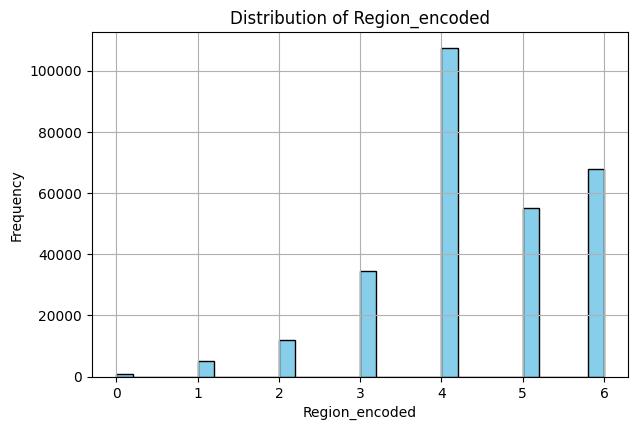

In [155]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df[feature].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [113]:
# Plotting the correlation heatmap

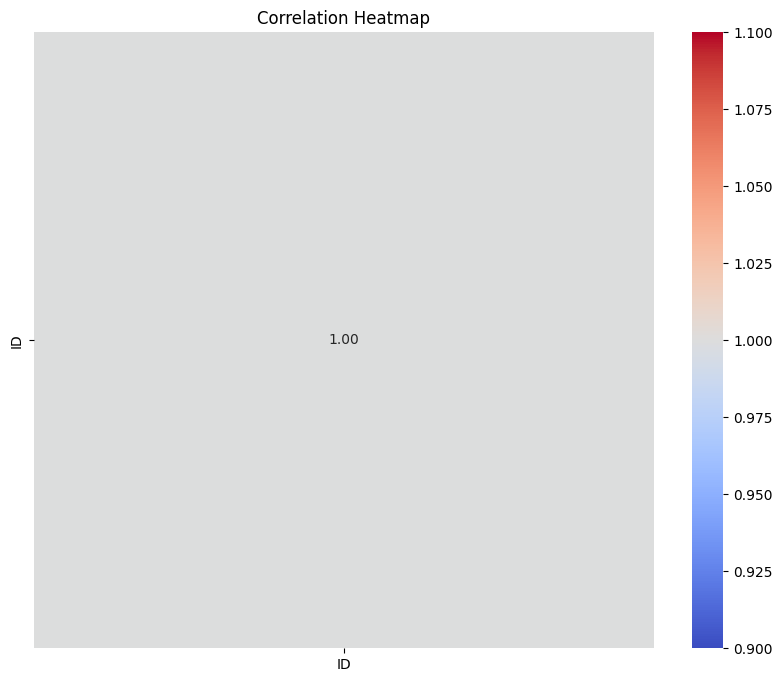

In [156]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [119]:
# Encode the 'Region' column

In [120]:
label_encoder = LabelEncoder()

In [121]:
df['Region_encoded'] = label_encoder.fit_transform(df['Region'])

In [122]:
# Insight 1: Regional Suitability

In [123]:
avg_suitability = df.groupby('Region')['Region_encoded'].mean()

In [124]:
avg_suitability = avg_suitability.sort_values(ascending=False)

In [125]:
print("Regional Suitability Ranking:")
print(avg_suitability)

Regional Suitability Ranking:
Region
Southern               6.0
South                  5.0
North                  4.0
Middle                 3.0
Indo-West              2.0
East                   1.0
Antarctica/Southern    0.0
Name: Region_encoded, dtype: float64


In [126]:
# Feature importance from a trained model (example with RandomForest)

In [127]:
importances = model.feature_importances_

In [128]:
# Plotting feature importance

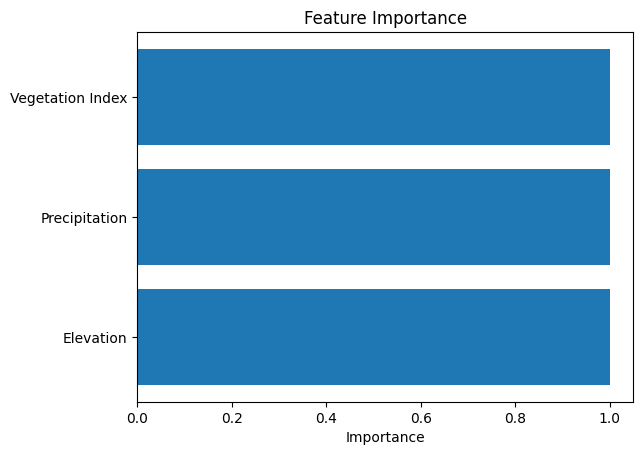

In [129]:
features = ['Elevation', 'Precipitation', 'Vegetation Index']  # Update based on actual feature names
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# ⚖️ **Balancing the Dataset with SMOTE** ⚖️

In this step, we address the issue of imbalanced classes using the **SMOTE** technique.

1. **Understanding SMOTE**:
   - **SMOTE** (Synthetic Minority Over-sampling Technique) generates synthetic examples for the underrepresented classes in the dataset.
   
2. **Apply SMOTE**:
   - Using **imblearn's SMOTE** implementation, apply this technique to balance the classes.
   - This helps the model to not be biased toward the majority class and improves overall performance.
   
3. **Impact of Balancing**:
   - Evaluate how the class balance affects the distribution of data and performance of the model.

In [130]:
# SMOTE for balancing dataset and training with Maxent (Logistic Regression)


In [131]:
smote = SMOTE(random_state=42)

In [132]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [133]:
# Check class distribution after SMOTE

In [134]:
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
Region_encoded
5    85858
3    85858
4    85858
6    85858
2    85858
1    85858
0    85858
Name: count, dtype: int64


# 🧠 **Model Training and Evaluation** 🧠

In this step, we train a machine learning model to predict habitat suitability using the preprocessed data.

1. **Choosing the Model**:
   - We use **Logistic Regression** for this project, which works well for classification tasks similar to habitat suitability prediction (similar to the **Maxent** model).
   
2. **Model Training**:
   - Split the data into **training** and **test** sets.
   - Train the **Logistic Regression** model on the training data.

3. **Model Evaluation**:
   - After training, evaluate the model's performance using various metrics like **accuracy**, **precision**, **recall**, and **F1-score**.
   - Use **classification reports** from Scikit-learn to summarize the performance of the model.

In [135]:
# Train the Maxent (Logistic Regression) model on the balanced dataset

In [136]:
maxent_smote = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)


In [137]:
maxent_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [138]:
# Evaluate the model on the test set

In [139]:
y_pred_smote = maxent_smote.predict(X_test)

In [140]:
accuracy_smote = accuracy_score(y_test, y_pred_smote)

In [141]:
print(f"Accuracy after SMOTE with Maxent: {accuracy_smote:.4f}")

Accuracy after SMOTE with Maxent: 0.6616


In [142]:
# Classification report

In [143]:
print("Classification Report after SMOTE with Maxent:")
print(classification_report(y_test, y_pred_smote))

Classification Report after SMOTE with Maxent:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       0.00      0.00      0.00      1047
           2       0.70      1.00      0.82      2405
           3       0.00      0.00      0.00      7062
           4       0.54      1.00      0.70     21373
           5       0.00      0.00      0.00     11034
           6       1.00      1.00      1.00     13452

    accuracy                           0.66     56563
   macro avg       0.46      0.57      0.50     56563
weighted avg       0.48      0.66      0.54     56563



In [147]:
# Save predictions to CSV

In [148]:
model_predictions = model.predict(X_test)  # Replace with your model's prediction step


In [149]:
predictions_df = pd.DataFrame(model_predictions, columns=['Prediction'])

In [150]:
predictions_df.to_csv('/content/model_predictions.csv', index=False)

# 📊 **Dash Dashboard for Model Insights** 📊

In this step, we build a **Dash** application to display the model's predictions and feature importance interactively.

1. **Setting Up Dash**:
   - Install and set up **Dash** to create an interactive dashboard.
   - This allows users to interact with the model's outputs in real-time.

2. **Display Predictions**:
   - Create a table or list to display the predicted habitat suitability scores for various regions.
   
3. **Feature Importance**:
   - Add a **bar chart** to display the importance of each feature in the model's predictions.
   
4. **User Interaction**:
   - Add interactive elements like **dropdowns** or **sliders** to allow users to filter and visualize data based on different parameters.
   
5. **Deploy the Dashboard**:
   - Once complete, the dashboard can be deployed for easy access to stakeholders or other team members.

In [159]:
# Initialize Dash app

In [160]:
app = dash.Dash(__name__)

In [161]:
# Load model predictions and feature importance (this is a placeholder; use your actual data)


In [162]:
model_predictions = [1, 0, 1]  # Replace with actual predictions

In [163]:
features = ['Elevation', 'Precipitation', 'Vegetation Index']

In [164]:
importances = [0.4, 0.3, 0.3]  # Replace with actual feature importance

In [165]:
# Build Dashboard Layout

In [166]:
app.layout = html.Div([
    html.H1("Habitat Suitability Modeling Dashboard"),

    html.Div([
        html.H2("Feature Importance"),
        dcc.Graph(
            figure=go.Figure(
                data=[go.Bar(x=features, y=importances)],
                layout=go.Layout(title="Feature Importance")
            )
        )
    ]),

    html.Div([
        html.H2("Model Predictions"),
        DataTable(
            id='prediction-table',
            columns=[{"name": "ID", "id": "ID"}, {"name": "Prediction", "id": "Prediction"}],
            data=[{"ID": i + 1, "Prediction": pred} for i, pred in enumerate(model_predictions)]
        )
    ])
])

In [167]:
# Run the app

In [168]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# 🚀 **Future Enhancements and Conclusion** 🚀

In this final step, we explore opportunities for improving the project:

1. **Enhance the Model**:
   - Experiment with more advanced algorithms like **Random Forest** or **XGBoost** for better prediction accuracy.
   
2. **Expand the Dataset**:
   - Incorporate more environmental features or additional regions to improve the model’s performance.
   
3. **Real-time Predictions**:
   - Integrate **real-time data** into the **Dash dashboard** to provide dynamic predictions based on updated environmental factors.

4. **Conclusion**:
   - By combining data science and environmental engineering, this project showcases how predictive models can help in decision-making for wildlife conservation and habitat management.